In [1]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

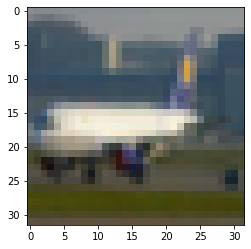

In [4]:
plt.imshow(xtr[93], cmap='gray')

In [5]:
ytr[93]

array([0], dtype=uint8)

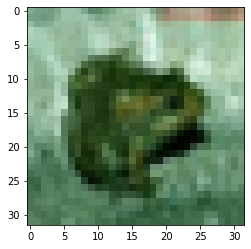

In [6]:
plt.imshow(xte[93], cmap='gray')

In [8]:
yte[93]

array([6], dtype=uint8)

In [9]:
ytr=tcg(ytr)
yte=tcg(yte)

In [10]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [11]:
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu', kernel_initializer='he_uniform'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
  
])

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/13
50000/50000 [==============================] - 6s 128us/sample - loss: 1.8893 - accuracy: 0.3129 - val_loss: 1.7371 - val_accuracy: 0.3737
Epoch 2/13
50000/50000 [==============================] - 6s 112us/sample - loss: 1.7070 - accuracy: 0.3838 - val_loss: 1.6586 - val_accuracy: 0.4059
Epoch 3/13
50000/50000 [==============================] - 6s 114us/sample - loss: 1.6179 - accuracy: 0.4179 - val_loss: 1.5795 - val_accuracy: 0.4382
Epoch 4/13
50000/50000 [==============================] - 6s 111us/sample - loss: 1.5684 - accuracy: 0.4384 - val_loss: 1.5501 - val_accuracy: 0.4444
Epoch 5/13
50000/50000 [==============================] - 6s 112us/sample - loss: 1.5185 - accuracy: 0.4574 - val_loss: 1.5316 - val_accuracy: 0.4480
Epoch 6/13
50000/50000 [==============================] - 6s 113us/sample - loss: 1.4792 - accuracy: 0.4721 - val_loss: 1.4836 - val_accuracy: 0.4746
Epoch 7/13
50000/50000 [==========================

In [15]:
model.evaluate(xtr,ytr)

50000/50000 [==============================] - 3s 59us/sample - loss: 1.2886 - accuracy: 0.5425


[1.2885661120986938, 0.54248]

In [16]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 1s 63us/sample - loss: 1.4338 - accuracy: 0.4959


In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4338203010559083
Test accuracy: 0.4959


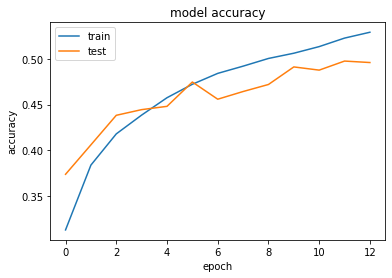

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

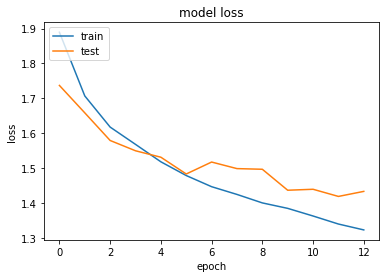

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()